In [ ]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.layers import Flatten, LSTM, BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
# Verisetinin yüklenmesi
train_dir=pd.read_csv("/content/train.csv")
test_dir=pd.read_csv("/content/test.csv")

# Sınıf sayısını belirleme ve etiket kodlama
label_encoder = LabelEncoder().fit(train_dir.species)
labels = label_encoder.transform(train_dir.species)
classes = list(label_encoder.classes_)
classes


['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [ ]:
train_dir=train_dir.drop(["id","species"],axis=1)
test_dir=test_dir.drop(["id"],axis=1)
nb_features=192
nb_classes=len(classes)
nb_classes

99

In [ ]:
scaler=StandardScaler()
scaler.fit(train_dir.values)
test_dir=scaler.transform(test_dir.values)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_dir, labels, test_size=0.2, random_state=42)

In [ ]:
# ... (previous code) ...

# Convert target variables to one-hot encoded format
y_train = to_categorical(y_train, num_classes=nb_classes)  # Assuming nb_classes is 99
y_valid = to_categorical(y_valid, num_classes=nb_classes)  # Assuming nb_classes is 99

# ... (rest of your code, including model compilation and training) ...

In [ ]:
X_train=np.array(X_train).reshape(792,192,1)
X_valid=np.array(X_valid).reshape(198,192,1)

In [ ]:
# Modelin Oluşturulması
model=Sequential()
model.add(LSTM(512,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.15))
model.add(Dense(2048,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(nb_classes,activation="softmax"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 512)                 │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2048)                │       1,050,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 99)                  │         101,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,304,995 (16.42 MB)

 Trainable params: 4,303,971 (16.42 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
%%time
# Derleme ve f1-skor gibi değerlerin oluşturulması
import tensorflow.keras.backend as K  # Use tensorflow.keras.backend

def recall_m(y_true, y_pred):
  true_positive=K.sum(K.round(K.clip(y_true*y_pred, 0,1)))
  possible_positive=K.sum(K.round(K.clip(y_true, 0,1)))
  recall=true_positive/(possible_positive+K.epsilon())
  return recall

def preccision_m(y_true, y_pred):
  true_positive=K.sum(K.round(K.clip(y_true*y_pred, 0,1)))
  predicted_positive=K.sum(K.round(K.clip(y_pred, 0,1)))
  precision=true_positive/(predicted_positive+K.epsilon())
  return precision

def f1_m(y_true, y_pred):
  precision=preccision_m(y_true, y_pred)
  recall=recall_m(y_true, y_pred)
  return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Modelin Derlenmesi
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",f1_m,preccision_m,recall_m])

# Modelin Eğitilmesi
score=model.fit(X_train,y_train, epochs=100, validation_data=(X_valid,y_valid))
#

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.0181 - f1_m: 0.0000e+00 - loss: 4.5580 - preccision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_loss: 4.6864 - val_preccision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.0547 - f1_m: 0.0000e+00 - loss: 4.0807 - preccision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.0051 - val_f1_m: 0.0000e+00 - val_loss: 6.0949 - val_preccision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0866 - f1_m: 0.0047 - loss: 3.6779 - preccision_m: 0.0782 - recall_m: 0.0024 - val_accuracy: 0.0101 - val_f1_m: 0.0000e+00 - val_loss: 7.1584 - val_preccision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1234 - f1_m: 0.0047 - loss: 3.4388 - preccision_m: 0.0604 - recall_m: 0.0025 - val_accuracy: 0.0051 - val_f1

In [ ]:
model.save("leaf2.model.h5")

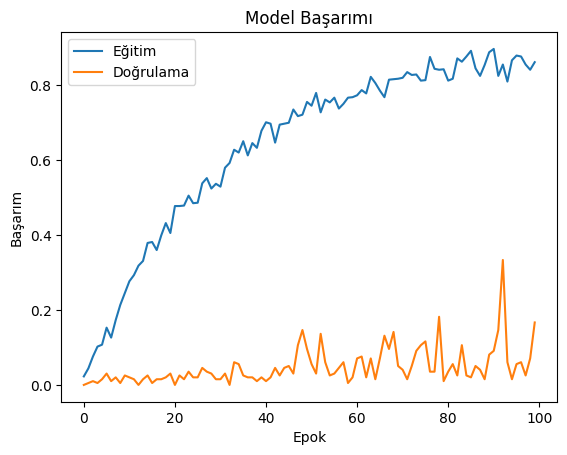

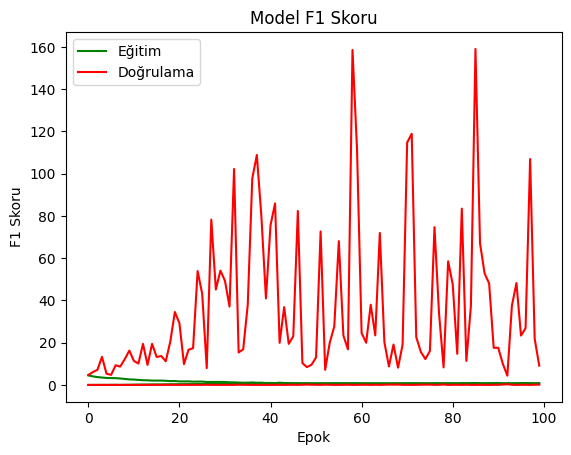

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Başarımı')
plt.ylabel('Başarım')
plt.xlabel('Epok')
plt.legend(["Eğitim","Doğrulama"], loc="upper left")
plt.show()

plt.plot(model.history.history['loss'],color="g")
plt.plot(model.history.history['val_loss'],color="r")
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epok')
plt.legend(["Eğitim","Doğrulama"], loc="upper left")

plt.plot(model.history.history['f1_m'],color="g")
plt.plot(model.history.history['val_f1_m'],color="r")
plt.title('Model F1 Skoru')
plt.ylabel('F1 Skoru')
plt.xlabel('Epok')
plt.legend(["Eğitim","Doğrulama"], loc="upper left")
plt.show()


Ortalama eğitim kaybı    : 1.1627302461862563
Ortalama eğitim başarımı : 0.6408459594100714
Ortalama doğrulama kaybı : 36.545815634727475
Ortalama doğrulama başarımı : 0.04737373770680278


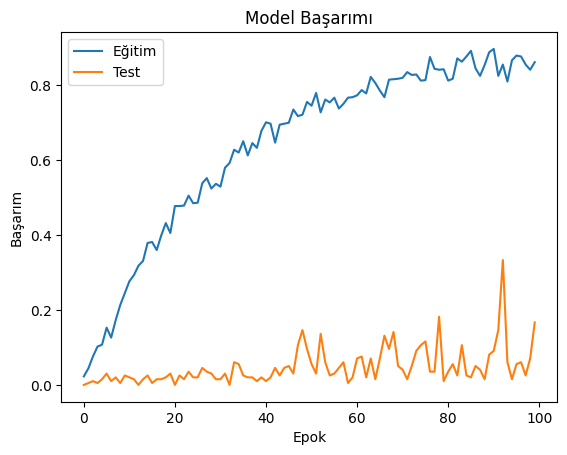

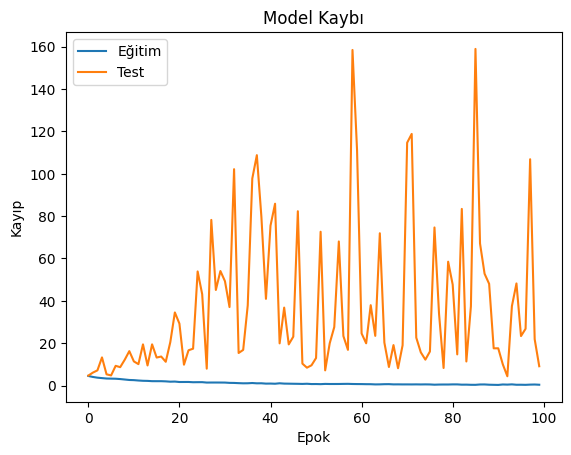

In [ ]:
# Sonuçların ortalama değerlerini yazdırma
print("Ortalama eğitim kaybı    :", np.mean(model.history.history['loss']))
print("Ortalama eğitim başarımı :", np.mean(model.history.history['accuracy']))
print("Ortalama doğrulama kaybı :", np.mean(model.history.history['val_loss']))
print("Ortalama doğrulama başarımı :", np.mean(model.history.history['val_accuracy']))

# Eğitim ve doğrulama başarımlarının gösterilmesi
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Başarımı')
plt.ylabel('Başarım')
plt.xlabel('Epok')
plt.legend(['Eğitim', 'Test'], loc='upper left')
plt.show()

# Eğitim ve doğrulama kayıplarının gösterilmesi
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epok')
plt.legend(['Eğitim', 'Test'], loc='upper left')
plt.show()